### Load Data

In [1]:
import pandas as pd

pd.set_option('display.max_columns', 100)

df_train = pd.read_parquet('../../data/model_data/training_data.parquet').sort_values(by=['Date', 'Ticker'], ignore_index=True)

df_train

,Date,Ticker,Adj Close in 60 Days,Adj Close,Volume,10 Day Avg Gain,10 Day Avg Loss,30 Day Avg Gain,30 Day Avg Loss,60 Day Avg Gain,60 Day Avg Loss,60 Day Price Std,60 Day Price Mean,60 Day Price 10th Percentile,60 Day Price 90th Percentile,Adj Close Mean 0 to 10 Day Lag,Adj Close Mean 10 to 20 Day Lag,Adj Close Mean 20 to 30 Day Lag,Adj Close Mean 30 to 40 Day Lag,Adj Close Mean 40 to 50 Day Lag,Adj Close Mean 0 to 10 Day Lag Difference,Adj Close Mean 10 to 20 Day Lag Difference,Adj Close Mean 20 to 30 Day Lag Difference,Adj Close Mean 30 to 40 Day Lag Difference,Volume Mean 0 to 10 Day Lag,Volume Mean 10 to 20 Day Lag,Volume Mean 20 to 30 Day Lag,Volume Mean 30 to 40 Day Lag,Volume Mean 40 to 50 Day Lag,Congressional Purchases Past 90 Calendar Days,Congressional Sales Past 90 Calendar Days,Unemployment Rate,DSG10,GDP
0,2015-12-24 00:00:00+00:00,AAPL,24.194263,24.494490,54281600.0,0.080037,0.264602,0.128333,0.189401,0.152332,0.156425,0.970395,25.979742,24.720767,27.224792,24.798318,26.579572,26.436727,27.177436,25.869796,-1.781253,0.142845,-0.740709,1.307640,195440160.0,144712000.0,145997280.0,173605320.0,208087560.0,0,1,5.0,2.25,18435.137
1,2015-12-24 00:00:00+00:00,CAT,59.485294,55.321060,2322100.0,0.580481,0.341272,0.365990,0.433235,0.411500,0.335728,2.065715,55.659195,52.515944,57.955542,53.339613,55.278802,56.091318,58.437958,56.003994,-1.939189,-0.812516,-2.346640,2.433964,7296050.0,6032330.0,5290740.0,5432720.0,7550870.0,0,1,5.0,2.25,18435.137
2,2015-12-24 00:00:00+00:00,CVX,65.311241,63.431988,4998700.0,0.797292,0.607789,0.568740,0.546405,0.603434,0.435118,2.167446,61.728233,59.691293,64.050002,62.549253,61.578304,62.236110,63.787218,61.303701,0.970949,-0.657806,-1.551108,2.483516,13462920.0,11568740.0,7670770.0,10350960.0,8460490.0,0,1,5.0,2.25,18435.137
3,2015-12-24 00:00:00+00:00,GS,129.326538,152.492950,1107600.0,1.443274,1.413191,0.928955,1.325819,1.014722,0.916516,4.884594,155.194709,149.171555,160.820096,150.637677,156.244505,159.165193,160.955830,154.478665,-5.606828,-2.920688,-1.790637,6.477165,3325280.0,2986550.0,2618510.0,2585760.0,3099650.0,1,1,5.0,2.25,18435.137
4,2015-12-24 00:00:00+00:00,HD,106.316124,107.910774,1517100.0,0.487182,0.457951,0.705197,0.468655,0.538126,0.316380,4.386560,102.682560,97.203424,108.652122,106.975397,108.263686,103.085273,100.959200,99.922850,-1.288289,5.178413,2.126073,1.036349,4665940.0,5317790.0,6897670.0,4067060.0,4360900.0,1,0,5.0,2.25,18435.137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29140,2024-07-03 00:00:00+00:00,MRK,113.690002,125.013603,4002100.0,0.900972,1.113550,0.571968,0.716370,0.514907,0.514201,2.291954,127.255922,124.141795,129.840558,128.426771,128.371864,126.554128,128.660353,127.112034,0.054907,1.817735,-2.106225,1.548319,14149900.0,6875150.0,8756370.0,6744190.0,7520570.0,0,1,4.3,4.36,29349.924
29141,2024-07-03 00:00:00+00:00,MSFT,428.019989,459.940979,9932800.0,2.303839,0.863437,2.247944,1.069069,2.276352,1.661719,18.010069,423.058963,400.674808,449.087555,451.470270,434.501843,422.797949,415.489096,401.206888,16.968427,11.703894,7.308853,14.282208,18827580.0,16383640.0,20807330.0,16184590.0,22515970.0,3,7,4.3,4.36,29349.924
29142,2024-07-03 00:00:00+00:00,UNH,581.849976,488.159027,2239200.0,3.952988,3.072107,2.638025,3.473563,3.259538,2.664708,18.427638,489.701731,474.279044,512.867938,488.678171,491.051801,499.923950,509.058670,486.139514,-2.373630,-8.872150,-9.134720,22.919156,5933730.0,3452100.0,3867740.0,2913310.0,3079510.0,0,1,4.3,4.36,29349.924
29143,2024-07-03 00:00:00+00:00,WBA,9.060000,10.841380,26845500.0,0.009767,0.499094,0.093112,0.311893,0.100178,0.227093,1.659137,15.978217,14.771623,17.460229,13.444287,15.364481,15.533450,17.143166,17.035427,-1.920194,-0.168969,-1.609716,0.107739,34387240.0,9924720.0,16974690.0,8874300.0,8472370.0,0,1,4.3,4.36,29349.924


In [2]:
df_test = pd.read_parquet('../../data/model_data/testing_data.parquet').sort_values(by=['Date', 'Ticker'], ignore_index=True)

df_test

,Date,Ticker,Adj Close in 60 Days,Adj Close,Volume,10 Day Avg Gain,10 Day Avg Loss,30 Day Avg Gain,30 Day Avg Loss,60 Day Avg Gain,60 Day Avg Loss,60 Day Price Std,60 Day Price Mean,60 Day Price 10th Percentile,60 Day Price 90th Percentile,Adj Close Mean 0 to 10 Day Lag,Adj Close Mean 10 to 20 Day Lag,Adj Close Mean 20 to 30 Day Lag,Adj Close Mean 30 to 40 Day Lag,Adj Close Mean 40 to 50 Day Lag,Adj Close Mean 0 to 10 Day Lag Difference,Adj Close Mean 10 to 20 Day Lag Difference,Adj Close Mean 20 to 30 Day Lag Difference,Adj Close Mean 30 to 40 Day Lag Difference,Volume Mean 0 to 10 Day Lag,Volume Mean 10 to 20 Day Lag,Volume Mean 20 to 30 Day Lag,Volume Mean 30 to 40 Day Lag,Volume Mean 40 to 50 Day Lag,Congressional Purchases Past 90 Calendar Days,Congressional Sales Past 90 Calendar Days,Unemployment Rate,DSG10,GDP
0,2015-12-24 00:00:00+00:00,AMGN,115.816658,126.452103,943000.0,1.096357,0.796363,1.006924,0.814146,1.009135,0.699529,4.877767,120.935859,113.872980,125.740771,124.367628,123.584390,122.481847,123.234310,119.349458,0.783237,1.102544,-0.752464,3.884852,3509140.0,2935060.0,3244410.0,3121370.0,3939210.0,0,1,5.0,2.25,18435.137
1,2015-12-24 00:00:00+00:00,BA,120.255928,128.722504,1185000.0,0.860066,1.118356,0.722253,0.765898,0.755481,0.550366,4.418714,128.754730,122.425815,132.987834,128.988866,131.408534,131.562788,131.684204,127.417228,-2.419669,-0.154253,-0.121416,4.266976,4102880.0,3429540.0,2874360.0,2669230.0,4932430.0,0,0,5.0,2.25,18435.137
2,2015-12-24 00:00:00+00:00,CRM,71.462753,77.486023,1084700.0,0.301661,0.455975,0.410512,0.439715,0.442038,0.360400,1.959126,77.697573,74.935341,80.333372,77.316764,80.091447,78.447742,78.189886,77.475058,-2.774683,1.643704,0.257856,0.714828,3380550.0,3321140.0,4858610.0,2680950.0,3133940.0,0,0,5.0,2.25,18435.137
3,2015-12-24 00:00:00+00:00,MMM,101.896019,93.109833,1014686.0,0.547489,0.937321,0.418124,0.558164,0.471638,0.355560,3.042756,94.410902,90.543301,97.323853,92.691669,96.557341,96.801584,96.959827,93.484661,-3.865672,-0.244243,-0.158244,3.475166,4314270.8,2702302.2,2377576.3,2735491.2,3282111.0,0,4,5.0,2.25,18435.137
4,2015-12-24 00:00:00+00:00,PG,65.515038,62.572762,2498000.0,0.392109,0.235263,0.312118,0.211999,0.276281,0.165433,1.708618,59.624889,57.670639,61.964988,62.221431,60.184812,59.228064,59.851521,59.040537,2.036619,0.956747,-0.623456,0.810983,11361240.0,8779930.0,7697420.0,7611840.0,10391110.0,5,0,5.0,2.25,18435.137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17147,2024-07-03 00:00:00+00:00,MMM,137.300003,101.075127,1230800.0,0.492346,0.407801,0.398187,0.493153,0.534609,0.363463,4.311441,97.311003,90.673070,101.844837,101.428220,99.968090,99.001164,99.215373,93.435883,1.460130,0.966926,-0.214209,5.779490,3857360.0,3596170.0,5981670.0,4513980.0,6318350.0,0,1,4.3,4.36,29349.924
17148,2024-07-03 00:00:00+00:00,PG,173.550003,162.850555,2980500.0,0.254468,0.724640,0.502974,0.618281,0.546859,0.401216,4.032108,162.986984,155.269542,166.811732,165.074182,166.086095,164.065250,165.471790,161.920151,-1.011913,2.020845,-1.406540,3.551639,7454720.0,5010550.0,5626180.0,5269990.0,6465080.0,1,2,4.3,4.36,29349.924
17149,2024-07-03 00:00:00+00:00,TRV,236.110001,202.802933,523100.0,0.665091,1.144991,0.749383,1.109372,0.799882,1.227396,4.858594,211.269899,204.942570,217.742920,205.892415,207.809865,210.726520,215.512764,211.772733,-1.917450,-2.916655,-4.786244,3.740031,1482260.0,1208760.0,1186330.0,952710.0,1215390.0,0,0,4.3,4.36,29349.924
17150,2024-07-03 00:00:00+00:00,V,275.170013,268.451660,5017800.0,1.084824,1.546899,0.893207,1.210904,0.873464,1.010804,4.046228,272.651303,267.565256,277.995547,269.957657,273.140280,272.119324,278.085852,270.490982,-3.182623,1.020956,-5.966528,7.594870,12733170.0,6560590.0,5575850.0,10566510.0,5965770.0,1,2,4.3,4.36,29349.924


In [3]:
df_val = pd.read_parquet('../../data/model_data/validation_data.parquet').sort_values(by=['Date', 'Ticker'], ignore_index=True)

df_val

,Date,Ticker,Adj Close in 60 Days,Adj Close,Volume,10 Day Avg Gain,10 Day Avg Loss,30 Day Avg Gain,30 Day Avg Loss,60 Day Avg Gain,60 Day Avg Loss,60 Day Price Std,60 Day Price Mean,60 Day Price 10th Percentile,60 Day Price 90th Percentile,Adj Close Mean 0 to 10 Day Lag,Adj Close Mean 10 to 20 Day Lag,Adj Close Mean 20 to 30 Day Lag,Adj Close Mean 30 to 40 Day Lag,Adj Close Mean 40 to 50 Day Lag,Adj Close Mean 0 to 10 Day Lag Difference,Adj Close Mean 10 to 20 Day Lag Difference,Adj Close Mean 20 to 30 Day Lag Difference,Adj Close Mean 30 to 40 Day Lag Difference,Volume Mean 0 to 10 Day Lag,Volume Mean 10 to 20 Day Lag,Volume Mean 20 to 30 Day Lag,Volume Mean 30 to 40 Day Lag,Volume Mean 40 to 50 Day Lag,Congressional Purchases Past 90 Calendar Days,Congressional Sales Past 90 Calendar Days,Unemployment Rate,DSG10,GDP
0,2015-12-24 00:00:00+00:00,AXP,53.312790,61.423836,1956400.0,0.365078,0.360697,0.232587,0.312839,0.245531,0.295891,2.345914,63.849332,61.135779,67.412856,60.703300,62.062912,62.931396,64.562424,66.024479,-1.359612,-0.868484,-1.631028,-1.462054,6577980.0,5235460.0,4932520.0,6215000.0,7275040.0,0,1,5.0,2.25,18435.137
1,2015-12-24 00:00:00+00:00,CSCO,21.135672,20.633146,8166300.0,0.166542,0.120574,0.114544,0.125597,0.112661,0.091937,0.663431,20.801952,20.064189,21.748457,20.199084,20.508805,20.470374,21.454555,21.639188,-0.309721,0.038431,-0.984182,-0.184632,24778710.0,23627670.0,36908410.0,26037480.0,22088420.0,0,0,5.0,2.25,18435.137
2,2015-12-24 00:00:00+00:00,DIS,90.638680,99.091301,4356100.0,0.580356,1.039025,0.510305,0.819761,0.566270,0.506301,4.315714,104.091629,98.092763,109.261369,101.826469,105.414491,109.385078,107.113773,103.566383,-3.588022,-3.970586,2.271304,3.547391,13367630.0,9767410.0,7206910.0,10503590.0,7509160.0,0,0,5.0,2.25,18435.137
3,2015-12-24 00:00:00+00:00,HON,89.748055,83.227882,832731.0,0.754738,0.524899,0.475564,0.422897,0.463923,0.324914,2.097698,80.788164,77.708540,82.883507,81.141813,82.130360,82.126520,81.710297,79.408560,-0.988548,0.003841,0.416223,2.301736,4516328.5,2761647.1,3331478.4,2719260.4,5065076.9,0,0,5.0,2.25,18435.137
4,2015-12-24 00:00:00+00:00,IBM,94.954712,89.372406,1563979.0,0.540437,0.445409,0.435495,0.365894,0.418437,0.461595,3.139906,90.550352,87.276630,96.078659,88.528802,89.805550,87.817047,89.249786,92.376886,-1.276748,1.988503,-1.432738,-3.127100,5200565.6,4224271.1,4412456.8,4705525.0,7938480.9,1,1,5.0,2.25,18435.137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17147,2024-07-03 00:00:00+00:00,HON,207.630005,211.303818,1086700.0,0.621600,0.662376,0.845707,0.585796,0.859209,0.598278,7.978585,201.162974,191.553133,212.279465,212.592758,208.578725,200.346765,200.930688,192.291165,4.014034,8.231960,-0.583923,8.639523,3191020.0,2572380.0,2527860.0,2425270.0,3180500.0,1,0,4.3,4.36,29349.924
17148,2024-07-03 00:00:00+00:00,IBM,220.839996,174.206345,1649000.0,1.226273,0.712766,0.800664,0.608677,0.646026,0.847996,5.953506,170.180709,164.179771,178.995076,172.272269,167.799390,167.435568,166.491324,166.810649,4.472879,0.363821,0.944244,-0.319325,4160870.0,3158030.0,3664780.0,3185900.0,6598910.0,0,1,4.3,4.36,29349.924
17149,2024-07-03 00:00:00+00:00,KO,71.790001,62.898792,9154200.0,0.216516,0.146992,0.175193,0.134083,0.195842,0.121082,1.688137,61.385548,58.183553,63.035769,62.981226,62.507845,61.625074,62.122773,60.898728,0.473381,0.882772,-0.497699,1.224045,12866900.0,10049930.0,10997740.0,10137340.0,14469920.0,0,0,4.3,4.36,29349.924
17150,2024-07-03 00:00:00+00:00,MCD,303.690002,248.553665,2026100.0,1.251721,1.330263,0.965298,1.500254,0.917774,1.180148,7.925374,261.112749,250.336351,270.584464,253.481990,253.631113,255.584926,267.550943,270.286166,-0.149123,-1.953813,-11.966017,-2.735223,4482100.0,2999610.0,4030070.0,3195520.0,3825750.0,0,0,4.3,4.36,29349.924


Remove features that do not seem impactful

In [4]:
df_train.drop(
    columns=[
        'Volume', '10 Day Avg Gain', '30 Day Avg Gain', '60 Day Price Std',
        '60 Day Price Mean', 'Adj Close Mean 30 to 40 Day Lag',
        'Adj Close Mean 10 to 20 Day Lag Difference',
        'Adj Close Mean 20 to 30 Day Lag Difference',
        'Adj Close Mean 30 to 40 Day Lag Difference',
        'Volume Mean 0 to 10 Day Lag', 'Volume Mean 20 to 30 Day Lag',
        'Volume Mean 30 to 40 Day Lag', 'Volume Mean 40 to 50 Day Lag',
        'Congressional Purchases Past 90 Calendar Days',

        'Adj Close Mean 10 to 20 Day Lag',
        'Adj Close Mean 40 to 50 Day Lag', 'Volume Mean 10 to 20 Day Lag',
    ],
    inplace=True,
)

df_test.drop(
    columns=[
        'Volume', '10 Day Avg Gain', '30 Day Avg Gain', '60 Day Price Std',
        '60 Day Price Mean', 'Adj Close Mean 30 to 40 Day Lag',
        'Adj Close Mean 10 to 20 Day Lag Difference',
        'Adj Close Mean 20 to 30 Day Lag Difference',
        'Adj Close Mean 30 to 40 Day Lag Difference',
        'Volume Mean 0 to 10 Day Lag', 'Volume Mean 20 to 30 Day Lag',
        'Volume Mean 30 to 40 Day Lag', 'Volume Mean 40 to 50 Day Lag',
        'Congressional Purchases Past 90 Calendar Days',

        'Adj Close Mean 10 to 20 Day Lag',
        'Adj Close Mean 40 to 50 Day Lag', 'Volume Mean 10 to 20 Day Lag',
    ],
    inplace=True,
)

df_val.drop(
    columns=[
        'Volume', '10 Day Avg Gain', '30 Day Avg Gain', '60 Day Price Std',
        '60 Day Price Mean', 'Adj Close Mean 30 to 40 Day Lag',
        'Adj Close Mean 10 to 20 Day Lag Difference',
        'Adj Close Mean 20 to 30 Day Lag Difference',
        'Adj Close Mean 30 to 40 Day Lag Difference',
        'Volume Mean 0 to 10 Day Lag', 'Volume Mean 20 to 30 Day Lag',
        'Volume Mean 30 to 40 Day Lag', 'Volume Mean 40 to 50 Day Lag',
        'Congressional Purchases Past 90 Calendar Days',

        'Adj Close Mean 10 to 20 Day Lag',
        'Adj Close Mean 40 to 50 Day Lag', 'Volume Mean 10 to 20 Day Lag',
    ],
    inplace=True,
)

df_train.shape, df_val.shape, df_test.shape

((29145, 17), (17152, 17), (17152, 17))

### Feature Setup

In [5]:
X_train = df_train.drop(columns=['Date', 'Ticker', 'Adj Close in 60 Days'])
y_train = df_train['Adj Close in 60 Days'] - df_train['Adj Close']

X_val = df_val.drop(columns=['Date', 'Ticker', 'Adj Close in 60 Days'])
y_val = df_val['Adj Close in 60 Days'] - df_val['Adj Close']

X_test = df_test.drop(columns=['Date', 'Ticker', 'Adj Close in 60 Days'])
y_test = df_test['Adj Close in 60 Days'] - df_test['Adj Close']

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((29145, 14), (17152, 14), (17152, 14), (29145,), (17152,), (17152,))

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.set_output(transform='pandas')

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train.shape, X_val.shape, X_test.shape

((29145, 14), (17152, 14), (17152, 14))

### Hyperparameter Tuning

In [7]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import GlorotNormal
from tensorflow.config.experimental import enable_op_determinism
from tensorflow.random import set_seed
import numpy as np
import os

os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"

def build_and_compile_model(input_shape: tuple, hidden_layer_neurons: list, l1s: list, l2s: list, learning_rate: float):
    enable_op_determinism()
    set_seed(22)

    inputs = Input(shape=input_shape, name='input')

    h = inputs
    for i, neurons in enumerate(hidden_layer_neurons):
        h = Dense(
            neurons,
            activation='relu',
            kernel_initializer=GlorotNormal(seed=22),
            kernel_regularizer=L1L2(l1=l1s[i], l2=l2s[i]),
            name=f"hidden_{i+1}"
        )(h)

    outputs = Dense(1, activation=None, kernel_initializer=GlorotNormal(seed=22), name='outputs')(h)

    mod = Model(inputs=inputs, outputs=outputs)

    mod.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_absolute_error', metrics=['mean_squared_error'])

    return mod

In [8]:
import optuna
from sklearn.metrics import mean_absolute_error

def objective(trial):
    # model tuning
    n_hidden_layers = trial.suggest_int(f"n_hidden_layers", 1, 3)

    hidden_layer_neurons = []
    l1s = []
    l2s = []
    for i in range(n_hidden_layers):
        hidden_layer_neurons.append(trial.suggest_categorical(f"hidden_layer_{i+1}_neurons", [2**n for n in range(5, 12)]))
        l1s.append(trial.suggest_float(f"hidden_layer_{i+1}_l1", 0.0, 0.1))
        l2s.append(trial.suggest_float(f"hidden_layer_{i+1}_l2", 0.0, 0.1))

    learning_rate = trial.suggest_float(f"learning_rate", 0.05, 0.20)
    batch_size = trial.suggest_categorical(f"batch_size", [2**n for n in range(10, 16)])

    mod = build_and_compile_model(
        input_shape=(X_train.shape[1],),
        hidden_layer_neurons=hidden_layer_neurons,
        l1s=l1s,
        l2s=l2s,
        learning_rate=learning_rate,
    )

    # cross validation
    mod.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=100,
        callbacks=[EarlyStopping(patience=10, restore_best_weights=True)],
        verbose=0,
    )

    return mean_absolute_error(y_test, mod.predict(X_test, verbose=0))

study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=22, n_startup_trials=10, multivariate=True, warn_independent_sampling=False))
study.optimize(objective, n_trials=20, show_progress_bar=True)

study.best_params

c:\Users\mhugh\anaconda3\envs\clean2\lib\site-packages\optuna\_experimental.py:30: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2024-11-26 22:24:50,754] A new study created in memory with name: no-name-0bf1504e-7b18-49bf-a382-d8f58846927e


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2024-11-26 22:24:59,551] Trial 0 finished with value: 13.242858401133937 and parameters: {'n_hidden_layers': 1, 'hidden_layer_1_neurons': 128, 'hidden_layer_1_l1': 0.022040451663772567, 'hidden_layer_1_l2': 0.08119509205386867, 'learning_rate': 0.05157903114741627, 'batch_size': 2048}. Best is trial 0 with value: 13.242858401133937.
[I 2024-11-26 22:25:06,851] Trial 1 finished with value: 13.355280738212723 and parameters: {'n_hidden_layers': 3, 'hidden_layer_1_neurons': 128, 'hidden_layer_1_l1': 0.058428964315689495, 'hidden_layer_1_l2': 0.07026355188654519, 'hidden_layer_2_neurons': 128, 'hidden_layer_2_l1': 0.08749277452777171, 'hidden_layer_2_l2': 0.07449320773686179, 'hidden_layer_3_neurons': 256, 'hidden_layer_3_l1': 0.009588460991804116, 'hidden_layer_3_l2': 0.004521011190769353, 'learning_rate': 0.15272430780006918, 'batch_size': 1024}. Best is trial 0 with value: 13.242858401133937.
[I 2024-11-26 22:25:14,068] Trial 2 finished with value: 13.357463298838086 and parameters: 

{'n_hidden_layers': 1,
 'hidden_layer_1_neurons': 32,
 'hidden_layer_1_l1': 0.00025422123747811335,
 'hidden_layer_1_l2': 0.04824174320925816,
 'learning_rate': 0.16951723925228693,
 'batch_size': 1024}

12.777515944834526

### Evaluation

In [9]:
n_hidden_layers = study.best_params['n_hidden_layers']

hidden_layer_neurons = []
l1s = []
l2s = []
for i in range(n_hidden_layers):
    hidden_layer_neurons.append(study.best_params[f"hidden_layer_{i+1}_neurons"])
    l1s.append(study.best_params[f"hidden_layer_{i+1}_l1"])
    l2s.append(study.best_params[f"hidden_layer_{i+1}_l2"])

learning_rate = study.best_params[f"learning_rate"]
batch_size = study.best_params[f"batch_size"]

# make sure to build mod in loop to prevent history
mod = build_and_compile_model(X_train.shape[1:], hidden_layer_neurons, l1s, l2s, learning_rate)

mod.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=500,
    callbacks=[EarlyStopping(patience=10, restore_best_weights=True)],
    verbose=1,
)

df_test['Prediction'] = mod.predict(X_test, verbose=0).reshape(-1) + df_test['Adj Close']

mean_absolute_error(df_test['Adj Close in 60 Days'], df_test['Prediction'])

Epoch 1/500
29/29 [==============================] - 1s 24ms/step - loss: 11.9687 - mean_squared_error: 343.8502 - val_loss: 9.2461 - val_mean_squared_error: 175.7962
Epoch 2/500
29/29 [==============================] - 0s 6ms/step - loss: 11.6505 - mean_squared_error: 335.6891 - val_loss: 9.4517 - val_mean_squared_error: 185.4339
Epoch 3/500
29/29 [==============================] - 0s 7ms/step - loss: 11.6779 - mean_squared_error: 336.8349 - val_loss: 9.1412 - val_mean_squared_error: 174.6371
Epoch 4/500
29/29 [==============================] - 0s 10ms/step - loss: 11.6432 - mean_squared_error: 335.2528 - val_loss: 9.1937 - val_mean_squared_error: 175.3866
Epoch 5/500
29/29 [==============================] - 0s 6ms/step - loss: 11.6359 - mean_squared_error: 335.2487 - val_loss: 9.1765 - val_mean_squared_error: 176.0855
Epoch 6/500
29/29 [==============================] - 0s 7ms/step - loss: 11.6072 - mean_squared_error: 335.0119 - val_loss: 9.1134 - val_mean_squared_error: 173.2981
Ep

13.210901948591214

In [10]:
X_train

,Adj Close,10 Day Avg Loss,30 Day Avg Loss,60 Day Avg Gain,60 Day Avg Loss,60 Day Price 10th Percentile,60 Day Price 90th Percentile,Adj Close Mean 0 to 10 Day Lag,Adj Close Mean 20 to 30 Day Lag,Adj Close Mean 0 to 10 Day Lag Difference,Congressional Sales Past 90 Calendar Days,Unemployment Rate,DSG10,GDP
0,0.025576,0.021971,0.022854,0.020889,0.027103,0.019819,0.018955,0.021485,0.020714,0.521653,0.028571,0.140351,0.387892,0.0
1,0.083321,0.028338,0.055169,0.074849,0.064312,0.075186,0.077534,0.075495,0.077053,0.519789,0.028571,0.140351,0.387892,0.0
2,0.098515,0.050468,0.070167,0.114811,0.084937,0.089480,0.089151,0.092922,0.088727,0.554146,0.028571,0.140351,0.387892,0.0
3,0.265347,0.117345,0.173461,0.200444,0.184837,0.267723,0.273612,0.259614,0.272876,0.476489,0.028571,0.140351,0.387892,0.0
4,0.181834,0.038026,0.059863,0.101214,0.060297,0.164203,0.174170,0.176991,0.166334,0.527473,0.000000,0.140351,0.387892,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29140,0.213872,0.092464,0.092692,0.096379,0.101348,0.217864,0.214559,0.217584,0.210921,0.543331,0.028571,0.078947,0.860987,1.0
29141,0.841271,0.071696,0.139435,0.463123,0.339482,0.768716,0.823102,0.828886,0.773734,0.743013,0.200000,0.078947,0.860987,1.0
29142,0.894131,0.255093,0.458098,0.667828,0.547623,0.915335,0.944679,0.899296,0.920261,0.514660,0.028571,0.078947,0.860987,1.0
29143,0.000000,0.041442,0.039088,0.010030,0.041768,0.000000,0.000342,0.000000,0.000000,0.520013,0.028571,0.078947,0.860987,1.0


In [12]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(df_test['Adj Close in 60 Days'], df_test['Prediction'])

13.210901948591214

In [13]:
# directional accuracy
((df_test['Adj Close in 60 Days'] >= df_test['Adj Close']) == (df_test['Prediction'] >= df_test['Adj Close'])).mean()

0.6192863805970149

In [14]:
(df_test['Adj Close in 60 Days'] - df_test['Prediction']).describe()

count    17152.000000
mean        -0.291418
std         22.202339
min       -250.702339
25%         -7.180981
50%          0.369502
75%          8.040798
max         99.428134
dtype: float64

In [15]:
(df_test['Adj Close in 60 Days'] - df_test['Prediction']).abs().describe()

count    17152.000000
mean        13.210902
std         17.846308
min          0.002150
25%          3.081628
50%          7.678473
75%         16.775221
max        250.702339
dtype: float64

What is the distribution of predictions from the model?

In [16]:
(df_test['Prediction'] - df_test['Adj Close']).describe(percentiles=[0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95])

count    17152.000000
mean         3.554386
std          2.291301
min          0.203707
5%           0.515899
10%          1.035369
25%          2.273009
50%          3.190651
75%          4.216661
90%          6.496667
95%          8.417361
max         19.936075
dtype: float64

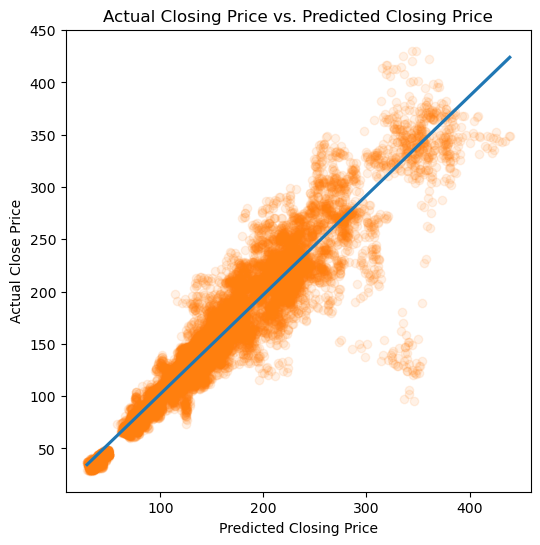

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6), dpi=100)

ax = sns.regplot(
    data=df_test,
    x='Prediction',
    y='Adj Close in 60 Days',
    scatter_kws={'alpha': 0.10, 'color': sns.color_palette()[1]},
    line_kws={'color': sns.color_palette()[0]},
)

plt.title('Actual Closing Price vs. Predicted Closing Price')
plt.xlabel('Predicted Closing Price')
plt.ylabel('Actual Close Price')

plt.show()

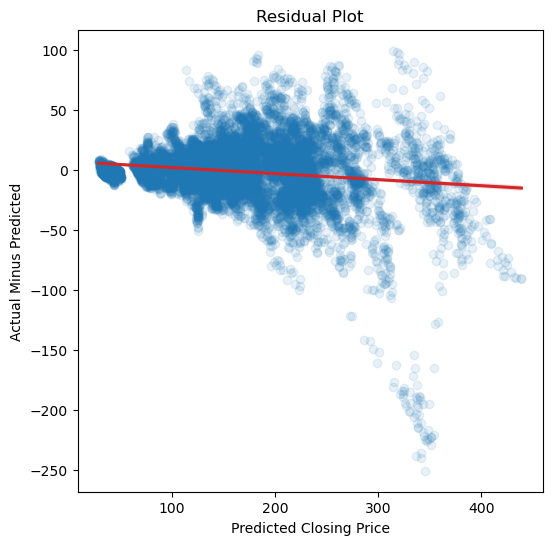

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6), dpi=100)

ax = sns.regplot(
    data=df_test.assign(f=(df_test['Adj Close in 60 Days'] - df_test['Prediction'])),
    x='Prediction',
    y='f',
    scatter_kws={'alpha': 0.10, 'color': sns.color_palette()[0]},
    line_kws={'color': sns.color_palette()[3]},
)

plt.title('Residual Plot')
plt.xlabel('Predicted Closing Price')
plt.ylabel('Actual Minus Predicted')

plt.show()

In [19]:
(df_test['Prediction'] > df_test['Adj Close']).mean()

1.0

In [20]:
(df_test['Adj Close in 60 Days'] > df_test['Adj Close']).mean()

0.6192280783582089

In [21]:
df_test.loc[df_test['Prediction'] > df_test['Adj Close'], ['Adj Close', 'Adj Close in 60 Days']].diff(axis=1)['Adj Close in 60 Days'].sum()

55966.433000564575

In [22]:
df_test.loc[df_test['Prediction'] < df_test['Adj Close'], ['Adj Close', 'Adj Close in 60 Days']].diff(axis=1)['Adj Close in 60 Days'].sum()

0.0

In [23]:
(df_test['Adj Close in 60 Days'] - df_test['Adj Close']).describe()

count    17152.000000
mean         3.262968
std         22.064209
min       -240.543556
25%         -4.017086
50%          3.005753
75%         11.673393
max        110.637756
dtype: float64

In [24]:
(df_test['Prediction'] - df_test['Adj Close']).describe()

count    17152.000000
mean         3.554386
std          2.291301
min          0.203707
25%          2.273009
50%          3.190651
75%          4.216661
max         19.936075
dtype: float64